# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> João Laet de Toledo </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon

In [38]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [39]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [40]:
df.loc[(df["Latitude"]<0), 'Hemisferio'] = 'Sul'
df.loc[(df["Latitude"]>0), 'Hemisferio'] = 'Norte'

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

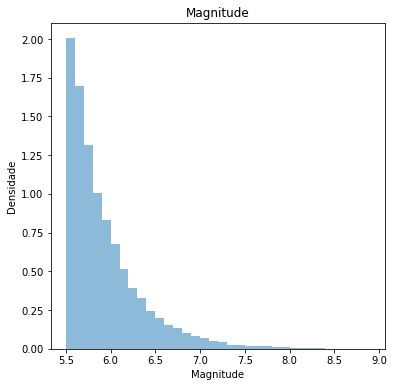

In [50]:
faixa = np.arange(5.5,9,0.1)
plot = df.Magnitude.plot.hist(bins=faixa, title='Magnitude',figsize=(6, 6), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Magnitude')
plt.show()

É possível ver com o histograma, que quanto menor a magnitude do abalo, maior será sua frequencia.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [42]:
loc = df["Magnitude"].mean()
scale = df["Magnitude"].std()
print("A média é de: " + str(loc))
print("O desvio padrão é de: " + str(scale))

A média é de: 5.882530753460003
O desvio padrão é de: 0.4230656393157772


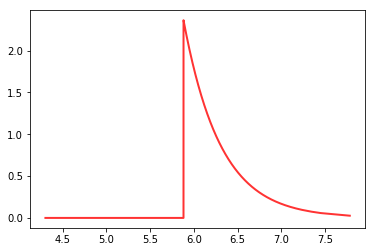

In [46]:
x=sorted(stats.norm.rvs(size=10000, loc=loc, scale=scale))
plt.plot(x, expon.pdf(x, loc=loc, scale=scale), lw=2, alpha=0.8, color="red")

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

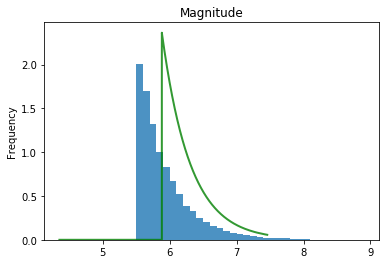

In [45]:
plot = df.Magnitude.plot.hist(bins=faixa, title="Magnitude", normed=1, alpha=0.8, sharex=True, histtype="stepfilled")

b=sorted(stats.norm.rvs(size=10000, loc=loc, scale=scale))
plt.plot(b, expon.pdf(b, loc=loc, scale=scale), lw=2, alpha=0.8, color="green")

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [66]:
DF = pd.DataFrame({'Type': df.Type,
                   'Hemisferio': df.Hemisferio})
A = pd.crosstab(DF.Type, DF.Hemisferio, normalize=True)*100
A.

Hemisferio,Norte,Sul
Type,,
Earthquake,44.714023,54.517107
Explosion,0.008543,0.008543
Nuclear Explosion,0.627910,0.119602
Rock Burst,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [52]:
norte = df[df.Hemisferio == 'Norte']
sul = df[df.Hemisferio == 'Sul']

print('Quantidade de terremotos no norte: ' + str(len(norte)))
print('Quantidade de terremotos no sul: ' + str(len(sul)))
print('Quantidade de terremotos em geral: ' + str(len(df.Hemisferio)))

Quantidade de terremotos no norte: 10617
Quantidade de terremotos no sul: 12794
Quantidade de terremotos em geral: 23412


In [53]:
terremotoN = len(norte)
geral = len(df.Hemisferio)

ProbabilidadeN = terremotoN / geral
ProbabilidadeN = ProbabilidadeN*100
print('A probabilidade de ter um terremoto no Norte é de: '+ str(ProbabilidadeN) + '%')

A probabilidade de ter um terremoto no Norte é de: 45.3485392106612%


Explique o seu raciocínio:

Para realizar essa conta, peguei o total de terromortos no norte e o total de terremotos no mundo. Logo fiz a conta P(A) = terremotos no Norte / Geral

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [54]:
chanceNE = A.Norte[2]*100/ProbabilidadeN
print(str(chanceNE)+'%')

1.38463105491%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

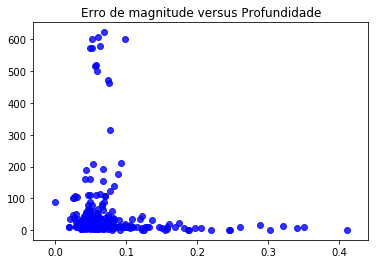

In [55]:
df.columns = df.columns.str.replace(" ", "_")

plt.scatter(df.Magnitude_Error, df.Depth, c='blue', alpha=0.8)
plt.title('Erro de magnitude versus Profundidade')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [56]:
cor = df.corr(method="pearson", min_periods=1).iloc[6:7,2:3]
print(cor)

                    Depth
Magnitude_Error -0.076918


Explique o que significa o valor da correlação calculada acima? 

A correlação é negativa, o que faz com que seja decrescente. Ela tambem é muito pequena, o que mostra uma forte disperção entre os pontos

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [32]:
latlog = df.iloc[:,2:4]
latlog.describe()

,Latitude,Longitude
count,23412.000000,23412.000000
mean,1.679033,39.639961
std,30.113183,125.511959
min,-77.080000,-179.997000
25%,-18.653000,-76.349750
50%,-3.568500,103.982000
75%,26.190750,145.026250
max,86.005000,179.998000


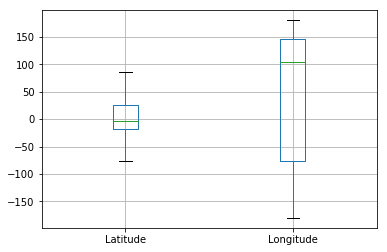

In [33]:
plot = df.boxplot(column=["Latitude", "Longitude"], figsize=(8,8))
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [64]:
ct3 = pd.crosstab(df.Magnitude_Type, df.Hemisferio, normalize="index")*100
ct4 = pd.crosstab(df.Type, df.Hemisferio, normalize="index")*100

pbnorte = ct3.Norte[0]*ct4.Norte[0]/100
pbsul = ct3.Sul[0]*ct4.Sul[0]/100

print("Probabilidade de ocorrer no Norte: " + str(pbnorte) + '%') 
print("Probabilidade de ocorrer no Sul: " + str(pbsul)+'%')
print("A propabilidade de ocorrer no Sul é maior")

Probabilidade de ocorrer no Norte: 20.1759764774%
Probabilidade de ocorrer no Sul: 30.3401712344%
A propabilidade de ocorrer no Sul é maior
